<hr style="border:2px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal Aplicada para Ciencia de Datos</h1></center> 
<center><h1 style="color:#173F8A;"> MDS3120</h1></center>
<hr style="border:2px solid #FEC60D"> </hr>
<h3 style="color:#0176DE;text-align:right;"> Profesores: &nbsp;Manuel A. Sanchez<br>Carlos Sing-Long<br></h3>

<h3 style="color:#03122E;text-align:right;"> 
    Magister en Ciencia de Datos - MDS <br> 
    Instituto de Ingenieria Matematica y Computacional - IMC<br>  
    Pontificia Universidad Catolica de Chile <br>   
</h3>

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tutorial 1: Algebra lineal, conceptos basicos</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

## Tabla de Contenidos
1. [Librerias de Python relevantes para el curso](#Librerias)
2. [**Tutorial**: Ejemplos de vectores - Imagenes como vectores](#Ejemplo-de-vectores:-Imagenes) 
3. [**Tutorial**: Ejemplo de operaciones lineales - suma de imagenes](#Ejemplo-de-operaciones-lineales:-suma-de-imagenes) 
4. [**Tutorial**: Ejemplo de Floating point](#Ejemplo:-Floating-point) 
5. [**Tutorial**: Ejemplo de funcion lineal - Regresion lineal](#Ejemplo-de-funcion-lineal:-Regresion-lineal)
6. [**Tutorial**: Ejemplo: serie de tiempo temperatura](#Ejemplo:-serie-de-tiempo-temperatura)

## Librerias
- [Numpy](https://numpy.org/doc/stable/)
- [Scipy linear algebra](https://docs.scipy.org/doc/scipy/reference/linalg.html)
- [Matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
- [Pandas](https://pandas.pydata.org/docs/) 
- [Scikit-learn](https://scikit-learn.org/stable/)

In [110]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Ejemplos de vectores: Colores RGB

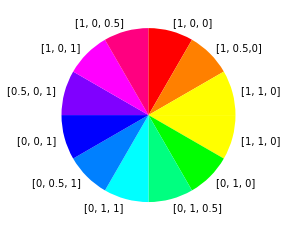

In [52]:
# Define colores como tuplas de 3
colors =[(1, 1, 0),(0, 1, 0),(0, 1, 0.5),(0, 1, 1),(0, 0.5, 1),(0, 0, 1),(0.5, 0, 1),(1, 0, 1),(1, 0, 0.5),(1, 0, 0),(1, 0.5,0),(1, 1, 0) ]
labels = '[1, 1, 0]','[0, 1, 0]','[0, 1, 0.5]','[0, 1, 1]','[0, 0.5, 1]','[0, 0, 1]','[0.5, 0, 1]','[1, 0, 1]','[1, 0, 0.5]','[1, 0, 0]','[1, 0.5,0]','[1, 1, 0]'
sizes = 30*np.ones(12)
# Graficar
fig, ax = plt.subplots()
ax.pie(sizes, colors = colors,labels=labels, counterclock=False)
# plt.savefig('colowheel.png') # Guardar figura
plt.show()

## Ejemplo de vectores: Imagenes

In [69]:
!pip install latexifier
from latexifier import latexify
from IPython.display import Latex
# Vector y matriz aleatoria de aleatorio de enteros
n = 3
c = np.random.randint(3, size=(n*n)); C = c.reshape(n,n)
clatex = latexify(c, newline=True, arraytype="bmatrix")
Clatex = latexify(C, newline=True, arraytype="bmatrix")
display(Latex(clatex))
display(Latex(Clatex))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

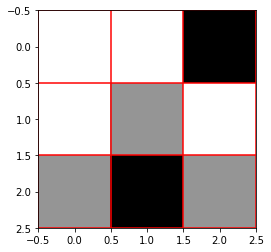

In [72]:
plt.imshow(C, cmap='Greys', interpolation='none')
x = np.linspace(-.5,n-0.5,n+1)
[X,Y] = np.meshgrid(x,x)
plt.plot(X.T,Y.T,'r')
plt.plot(X,Y,'r')
plt.axis('scaled')
plt.show()

## Ejemplo de operaciones lineales: suma de imagenes

*** Tamano de los vectores: 360000
*** Tamano de las matrices: (600, 600)


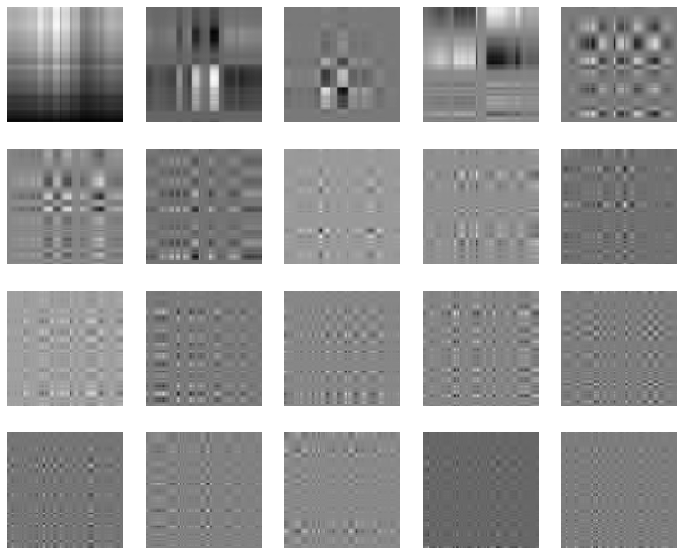

*** Suma de imagenes:


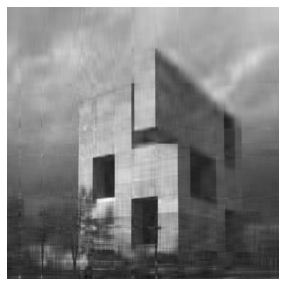

In [94]:
W = np.load('edif_elemental.npy')
print("*** Tamano de los vectores:", W[0].size)
Wimag = []
Wsum = np.zeros(W[0].size)
for w in W:
    Wimag.append(w.reshape(600,600))
    Wsum += w
Wsumimag = Wsum.reshape(600,600)
print('*** Tamano de las matrices:', Wimag[0].shape)

fig1, ax1 = plt.subplots(4,5,figsize=(12,10))
for i, axi in enumerate(fig1.axes):
    axi.imshow(Wimag[i], cmap='gray')
    axi.set_axis_off()
plt.show()

print("*** Suma de imagenes:")
fig2, ax2 = plt.subplots(1,1,figsize=(6,5))
ax2.imshow(Wsumimag, cmap='gray')
ax2.set_axis_off()
plt.show()

## Ejemplo: Floating point

In [ ]:
np.set_printoptions(precision=5)

### Errores de redondeo 
Calcular la raiz de la ecuacion $x^{2}-2px - q = 0$

In [104]:
m1_rmin = lambda p,q: p - np.sqrt(p**2+q)
m2_rmin = lambda p,q: -q/(p+np.sqrt(p**2+q))

p = 123456789; q = 1
p16 = np.float16(p)
p32 = np.float32(p)
p64 = np.float64(p)
print(p16,p32,p64)
peval = p64;qeval = q
print("method 1 r_min: ", m1_rmin(peval,qeval))
print("method 2 r_min: ", m2_rmin(peval,qeval))

inf 123456790.0 123456789.0
method 1 r_min:  0.0
method 2 r_min:  -4.050000036855001e-09


<ipython-input-104-666ec1bb2e61>:5: RuntimeWarning: overflow encountered in cast
  p16 = np.float16(p)


### Una ilustracion de la precision de punto flotante de numpy

In [105]:
pi16 = np.array([np.pi], dtype=np.float16)
pi32 = np.array([np.pi], dtype=np.float32)
pi64 = np.array([np.pi], dtype=np.float64)
print(' pi numpy.float16:',pi16[0],'\n pi numpy.float32:',pi32[0],'\n pi numpy.float64:',pi64[0],'\n numpy.pi        :', np.pi)

 pi numpy.float16: 3.14 
 pi numpy.float32: 3.1415927 
 pi numpy.float64: 3.141592653589793 
 numpy.pi        : 3.141592653589793


## Ejemplo de funcion lineal: Regresion lineal

In [106]:
# Base de datos de casas
housing = pd.read_csv('Housing.csv.xls')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [107]:
housing.shape

In [108]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [109]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


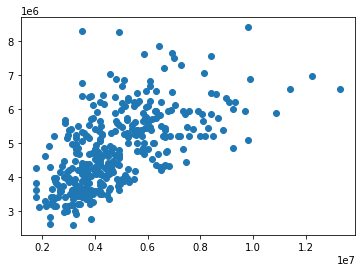

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

y_train = df_train.pop('price')
X_train = df_train[['area', 'bedrooms']]

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
plt.scatter(y_train, y_pred); plt.show()

## Ejemplo: serie de tiempo temperatura

In [120]:
df = pd.read_csv('Temperatura.csv', delimiter=';', header=0,nrows=41)
df.head()

,Ano,Temperatura Minima Media,Temperatura Minima Absoluta,Temperatura Minima Dia,Temperatura Maxima Media,Temperatura Maxima Absoluta,Temperatura Maxima Dia,Temperatura Media Climatologica,Temperatura Media Aritmetica,Cantidad de Datos
0,2023,6.2,1.5,3,16.9,25.9,29,11.0,11.0,31
1,2022,3.2,-0.6,7,15.0,23.8,29,8.1,8.1,31
2,2021,2.9,-0.5,17,19.2,28.3,20,9.4,9.4,31
3,2020,.,.,.,14.9,23.0,14,.,11.5,31
4,2019,3.6,-1.8,23,16.2,23.4,30,9.9,11.7,31


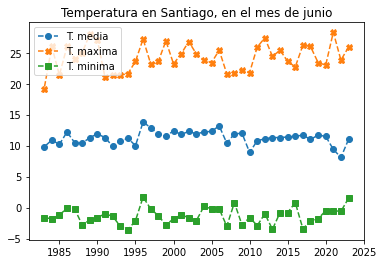

In [129]:
# df.plot(x="Ano", y='Temperatura Media Aritmetica',marker='o', linestyle='--')
x = df["Ano"].to_numpy()
y1 = df["Temperatura Media Aritmetica"].to_numpy()
y1 = np.asarray(y1)
y2 = df["Temperatura Maxima Absoluta"].to_numpy()
y3 = df["Temperatura Minima Absoluta"].to_numpy()
y3[3] = '-0.5'
y3 = y3.astype('float64')
plt.plot(x,y1,'--o', label='T. media')
plt.plot(x,y2,'--X', label='T. maxima')
plt.plot(x,y3,'--s', label='T. minima')
plt.title('Temperatura en Santiago, en el mes de junio')
plt.legend()
plt.show()

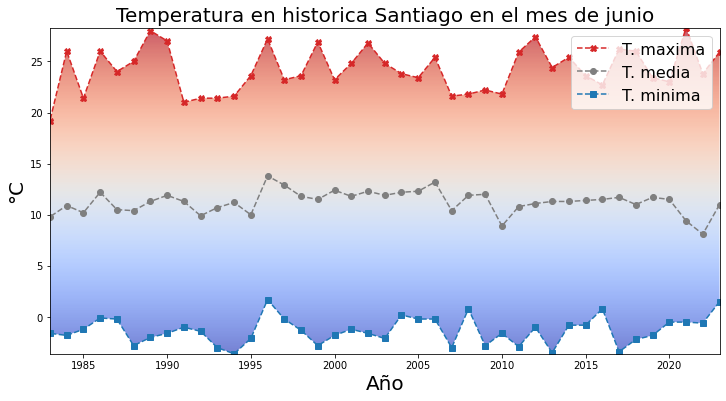

In [133]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from matplotlib import cm


fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(x,y2,'--X', label='T. maxima', color='C03')
ax.plot(x,y1,'--o', label='T. media',color='C07')
ax.plot(x,y3,'--s', label='T. minima', color='C00')
plt.title('Temperatura en historica Santiago en el mes de junio',fontsize='20')

cm1 = cm.coolwarm

polygon = plt.fill_between(x, y2, y3, lw=0, color='none')
xlim = (x.min(), x.max())
ylim = (y3.min(), y2.max())
verts = np.vstack([p.vertices for p in polygon.get_paths()])
gradient = ax.imshow(np.linspace(0, 1, 256).reshape(-1, 1), cmap=cm1, aspect='auto', origin='lower',
                      extent=[verts[:, 0].min(), verts[:, 0].max(), verts[:, 1].min(), verts[:, 1].max()], alpha=0.7)
gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.legend(fontsize='16')
ax.set_ylabel('°C',fontsize='20')
ax.set_xlabel('Año',fontsize='20')
fig.savefig('temp_C.png')
plt.show()

In [131]:
def tranCtoF(y):
    return y*9.0/5.0+32
yF1 = tranCtoF(y1)
yF2 = tranCtoF(y2)
yF3 = tranCtoF(y3)

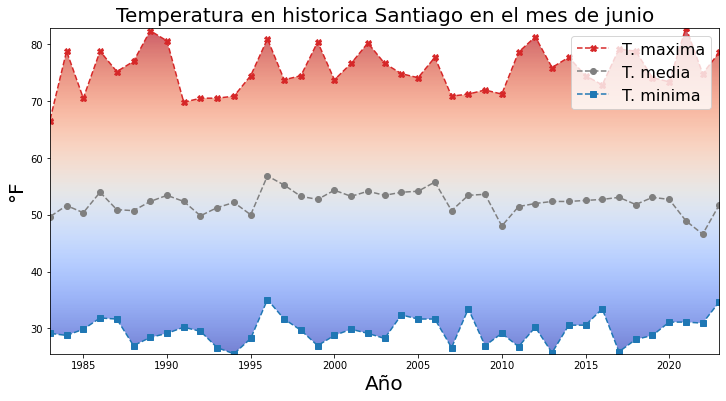

In [134]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(x,yF2,'--X', label='T. maxima', color='C03')
ax.plot(x,yF1,'--o', label='T. media',color='C07')
ax.plot(x,yF3,'--s', label='T. minima', color='C00')
plt.title('Temperatura en historica Santiago en el mes de junio', fontsize='20')

cm1 = cm.coolwarm

polygon = plt.fill_between(x, yF2, yF3, lw=0, color='none')
xlim = (x.min(), x.max())
yFlim = (yF3.min(), yF2.max())
verts = np.vstack([p.vertices for p in polygon.get_paths()])
gradient = ax.imshow(np.linspace(0, 1, 256).reshape(-1, 1), cmap=cm1, aspect='auto', origin='lower',
                      extent=[verts[:, 0].min(), verts[:, 0].max(), verts[:, 1].min(), verts[:, 1].max()], alpha=0.7)
gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData)
ax.set_xlim(xlim)
ax.set_ylim(yFlim)
ax.legend(fontsize='16')
ax.set_ylabel('°F', fontsize='20')
ax.set_xlabel('Año', fontsize='20')
fig.savefig('temp_F.png')
plt.show()